## **Count of most frequently used words**
Homework-2
## **Imports**
**numpy** --> Used for math and logic operations on our data
**pandas** --> Used for the storing and basic handling of data
**matplotlib** --> Used for data visualisation, creating plots, graphs, etc.
**Pyspark** --> For processing files

In [1]:
import findspark
findspark.init()
import pyspark as spark

[('мы', 146), ('год', 72), ('дорогие', 62), ('друзья', 62), ('россии', 57), ('все', 43), ('новый', 41), ('всё', 35), ('пусть', 34), ('вместе', 30)]


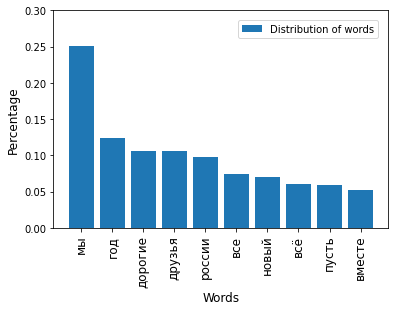

In [6]:
from collections import Counter
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
spark = SparkSession.builder.getOrCreate()

rdd3 = spark.sparkContext.textFile("NY_Speeches/*.txt")
words = []
llist = rdd3.collect()

for el in llist:
    bl = ['.', '!', ',']
    internal_l = el.split()
    for i_el in internal_l:
        i_el = i_el.strip()
        if i_el[len(i_el)-1] in bl:
            words.append(i_el[:len(i_el)-1].lower())
        elif not i_el.isalpha():
            continue
        else:
            words.append(i_el.lower())

black_list = ["и", "на", "с", "них", "из", "бы", "к", "ни", "в", "его", "за", "когда", "был", "были", "новым", "нового", "годом", "года", "нашей", "что", "нас", "как", "для", "но", "это", "от", "чтобы", "наших", "не"]
def filtr(str):
    if len(str) == 1:
        return False
    if str in black_list:
        return False
    else: 
        return True

filtered_words = filter(filtr, words)
    
    
c = Counter(filtered_words)
most_common_ten = c.most_common(10)
print(most_common_ten)
keys = []
vals = []
for el in most_common_ten:
    keys += [el[0]]
    vals += [el[1]]

plt.bar(keys, np.divide(list(vals), sum(vals)), label="Distribution of words")

plt.ylim(0,0.3)
plt.ylabel ('Percentage', fontsize=12)
plt.xlabel ('Words', fontsize=12)
plt.xticks(list(keys), fontsize=12)
plt.xticks(rotation=90)
plt.legend (bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=1.)

plt.show()